# Aula 07: Análise Exploratória para Modelagem    

*   **Professor:** Paulo Rogério Pires Manseira
*   **Alunos:** Maruan Biasi El Achkar e Ricardo Falcão Schilieper
*   **GitHub:** github.com/manseiracredit

---

# Importar Dataset - Telco Customer Churn
**Fonte:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


# Criar Dataframe

In [3]:
import os
import pandas as pd

path_csv = os.path.join(path, 'WA_Fn-UseC_-Telco-Customer-Churn.csv')

df = pd.read_csv(path_csv)

display(df.head(3))

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#  Carregamento e Diagnóstico

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [6]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
display(df.isnull().sum())

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Análise da Variável-Alvo ( Churn )

In [11]:
import seaborn as sns

<Axes: xlabel='Churn', ylabel='count'>

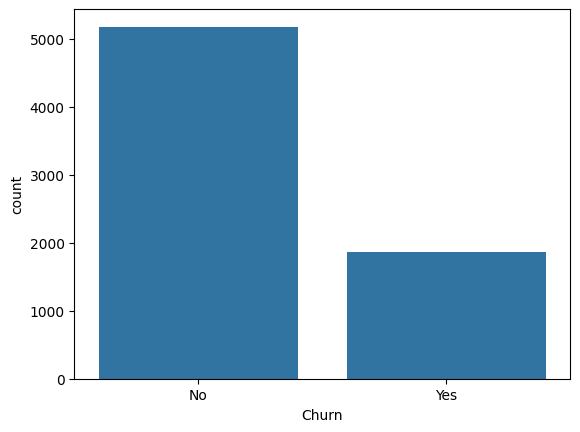

In [13]:
sns.countplot(data=df, x='Churn')

### Pergunta para Reflexão:
- As classes estão balanceadas? Se um grupo é muito menor que o outro, que desafios isso pode trazer para o nosso modelo?

**Resp.:** Não estão balanceadas, o gráfico nos indica que a quantidade de negativos na métrica alvo "Churn" é mais que o dobro da quantidade de positivos.
Isso pode desencadear em um algorítimo de predição que é melhor em prever negativos do que positivos, o que também acarreta em uma  quantidade significante de falsos negativos.

---

# Relação entre Variáveis Categóricas e o Churn

<Axes: xlabel='Contract', ylabel='count'>

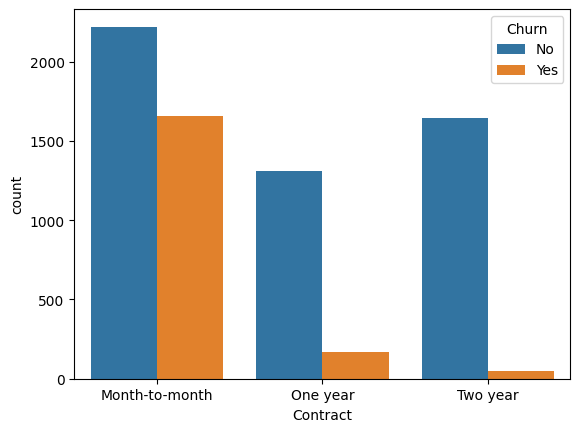

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)

<Axes: xlabel='InternetService', ylabel='count'>

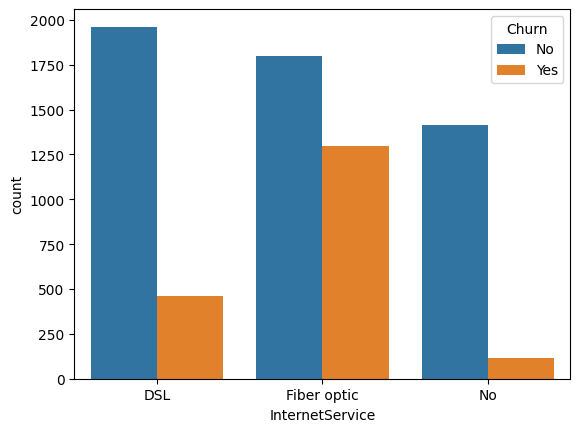

In [15]:
sns.countplot(x='InternetService', hue='Churn', data=df)

<Axes: xlabel='Partner', ylabel='count'>

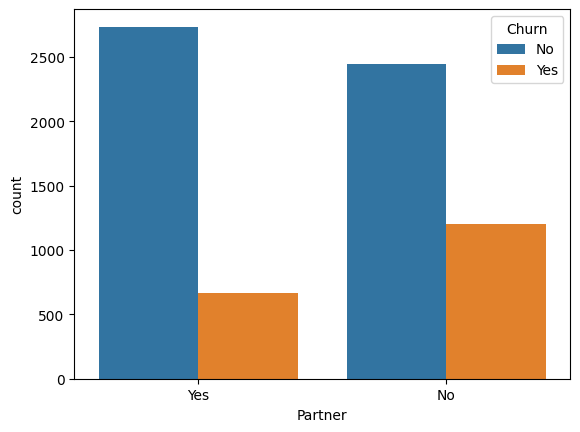

In [16]:
sns.countplot(x='Partner', hue='Churn', data=df)

### Pergunta para Reflexão
- Em qual categoria de contrato (mensal, um ano, dois anos) a barra de 'Churn: Yes' é proporcionalmente maior? O que isso nos diz sobre o comportamento do cliente?

**Resp.:** Na categoria mensal (Month-to-month). Isso nos diz que, clientes assinantes do plano mensal são mais propícios a cancelarem o plano. Acreditamos que essa estatíscias esteja "invertida", nossa interpretação é que, clientes que pretendem cancelar, optam pelo plano mensal para gastarem o mínimo possível.

---

# Relação entre Variáveis Numéricas e o Churn

<Axes: xlabel='Churn', ylabel='tenure'>

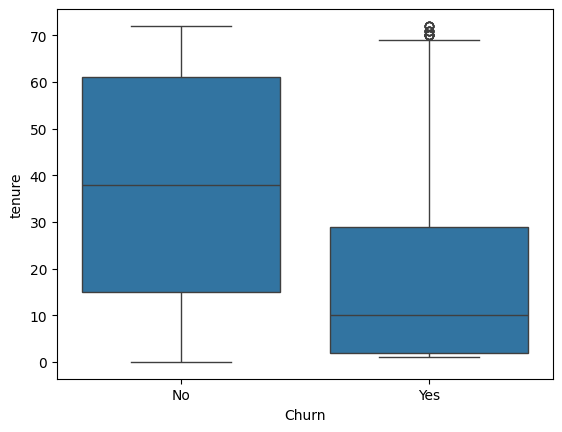

In [17]:
sns.boxplot(x='Churn', y='tenure', data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

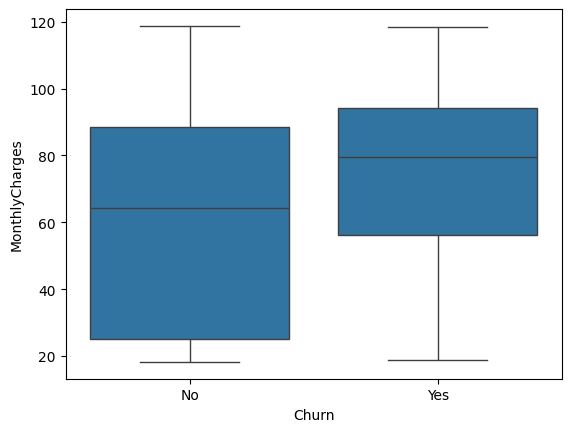

In [18]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

### Pergunta para Reflexão

- Clientes que cancelam ( Churn: Yes ) tendem a ter um tempo de contrato ( tenure ) maior ou menor? E suas cobranças mensais, são mais altas ou mais baixas? O que as medianas nos boxplots revelam?

**Resp.:** Clientes que cancelam tendem a ter um tempo de contrato menor e também tendem a ter cobranças mensais mais altas. As medianas revelam essas duas tendências mencionadas.